In [1]:
!pip install pandas

In [2]:
import pandas as pd

# Initial Data Exploration

In [118]:
# Read spotify dataset from the CSV file and parse into a data frame
data_frame= pd.read_csv("C:\\Users\\user1\\Downloads\\archive\\archive\\songs_normalize.csv", sep= ',')
data_frame.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


## Data Frame Shape

In [161]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [241]:
#all columns
data_frame.columns

Index(['artist', 'song', 'duration_ms', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre'],
      dtype='object')

In [109]:
# Number of rows
data_frame.shape[0]

2000

In [163]:
# Number of columns
data_frame.shape[1]

18

# Statistics and Graphs

In [79]:
# Get statistical paramters of the popularity distribution
data_frame['popularity'].describe()

count    2000.000000
mean       59.872500
std        21.335577
min         0.000000
25%        56.000000
50%        65.500000
75%        73.000000
max        89.000000
Name: popularity, dtype: float64

In [164]:
# Get statistical paramters of the duration_ms distribution
data_frame['duration_ms'].describe()

count      2000.000000
mean     228748.124500
std       39136.569008
min      113000.000000
25%      203580.000000
50%      223279.500000
75%      248133.000000
max      484146.000000
Name: duration_ms, dtype: float64

In [168]:
# There are a 1000 miliseconds is a second and 60 seconds in a minute -> the average duration of a song in minutes is:
data_frame['duration_ms'].mean() / (1000 * 60) 

3.8124687416666667

In [263]:
# Songs that are the _least_ instrumental
data_frame.loc[data_frame['instrumentalness'] == data_frame['instrumentalness'].min(), ['artist', 'song', 'instrumentalness']]

,artist,song,instrumentalness
1,blink-182,All The Small Things,0.0
2,Faith Hill,Breathe,0.0
6,Eminem,The Real Slim Shady,0.0
7,Robbie Williams,Rock DJ,0.0
8,Destiny's Child,Say My Name,0.0
...,...,...,...
1989,Marshmello,One Thing Right,0.0
1990,Sam Smith,How Do You Sleep?,0.0
1994,Post Malone,Goodbyes (Feat. Young Thug),0.0
1995,Jonas Brothers,Sucker,0.0


## Speechiness vs. Instrumentalness

<AxesSubplot:xlabel='speechiness'>

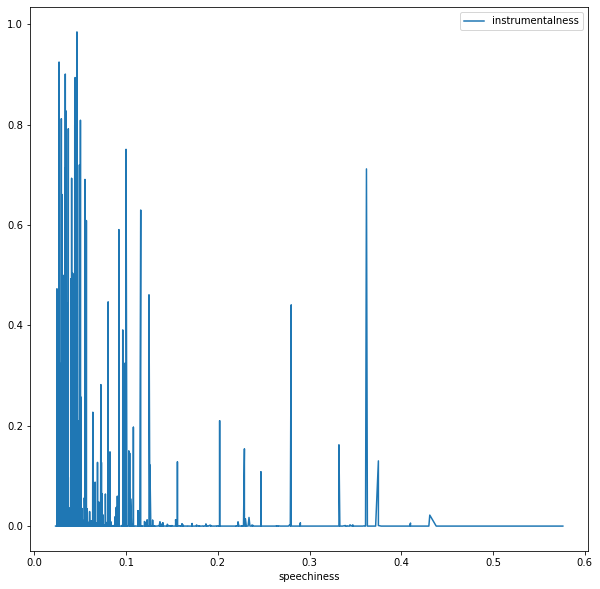

In [82]:
# Plot speechiness vs. instrumentalness of a song
data_frame.sort_values("speechiness").plot(x="speechiness", y ="instrumentalness", figsize=(10, 10))

As per our intuition, a song with low speechiness is more likly to be instrumental. There for we expect the correlation between speechines and instrumentalness to be negative.

In [170]:
# Calculate correlation between speechiness and instrumentalness
data_frame.corr()["speechiness"]["instrumentalness"]

-0.06295384462837199

## Number of Songs Per Artist

In [306]:
#total number of artist in the data
data_frame["artist"].value_counts().count()


835

In [191]:
# Count the number of songs per artist
data_frame['artist'].value_counts().head()

Rihanna           25
Drake             23
Eminem            21
Calvin Harris     20
Britney Spears    19
Name: artist, dtype: int64

In [322]:
# Get artists with more than 5 songs
pd.DataFrame(data_frame['artist'].value_counts()>5).reset_index()#.head()


,index,artist
0,Rihanna,True
1,Drake,True
2,Eminem,True
3,Calvin Harris,True
4,Britney Spears,True
...,...,...
830,Sidney Samson,False
831,Cam’ron,False
832,Elvis Presley,False
833,Lucenzo,False


In [311]:
#artist who has the highst popularity
data_frame.loc[data_frame['popularity']==data_frame['popularity'].max()][['artist','popularity']]

,artist,popularity
1322,The Neighbourhood,89


<AxesSubplot:ylabel='Density'>

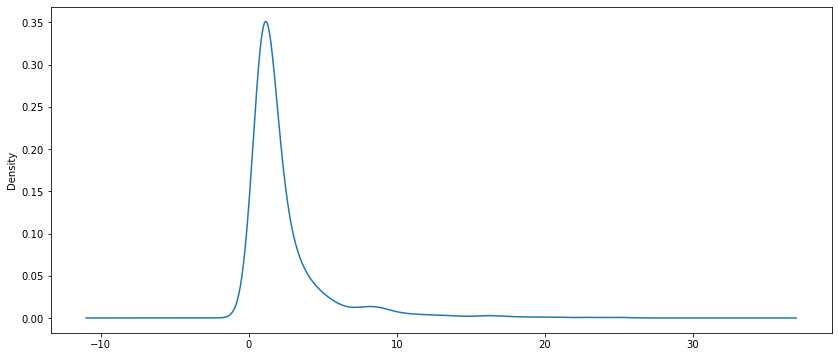

In [171]:
# Plot the distribution of the number of songs per artist
data_frame['artist'].value_counts().plot(kind='density', figsize=(14,6))

<AxesSubplot:>

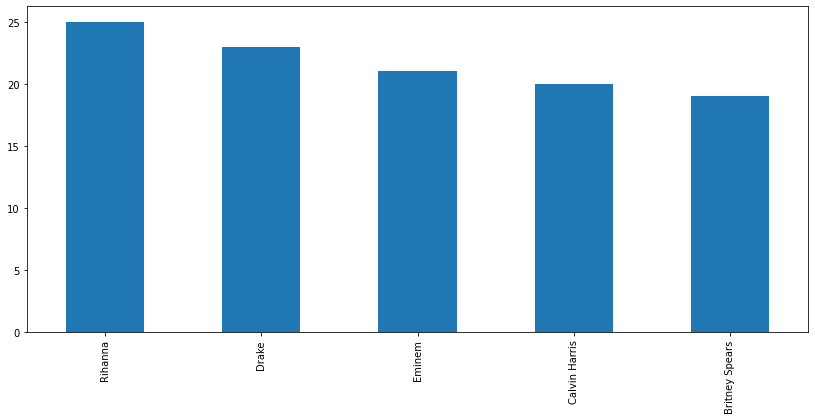

In [8]:
# Bar chart of the number of songs per artist for the most prolific artists
data_frame['artist'].value_counts().head().plot(kind='bar', figsize=(14,6))

## Popularity

<AxesSubplot:ylabel='Density'>

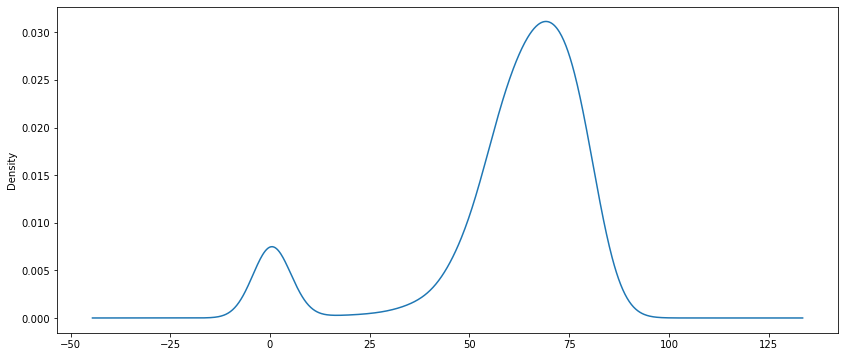

In [9]:
# Plot popularity distribution
data_frame['popularity'].plot(kind='density', figsize=(14, 6))

In [345]:
# Data for most popular songs
data_frame.loc[data_frame['popularity']== data_frame['popularity'].max(),['artist','song','year', 'popularity']]

,artist,song,year,popularity
1322,The Neighbourhood,Sweater Weather,2013,89


### Popularity Along the Years

In [339]:
# Order popularity along the years
data_frame.sort_values("year")[["year","popularity"]]#.max()

,year,popularity
44,1998,49
82,1999,54
123,1999,71
34,1999,58
35,1999,59
...,...,...
333,2019,47
1999,2019,85
568,2020,34
308,2020,39


In [335]:
# Get mean popularity per year
data_frame.groupby("year")[["year","popularity"]].mean()

,year,popularity
year,,
1998,1998.0,49.000000
1999,1999.0,64.921053
2000,2000.0,58.554054
2001,2001.0,59.407407
2002,2002.0,62.400000
2003,2003.0,58.793814
2004,2004.0,58.427083
2005,2005.0,61.759615
2006,2006.0,57.389474


<AxesSubplot:xlabel='year'>

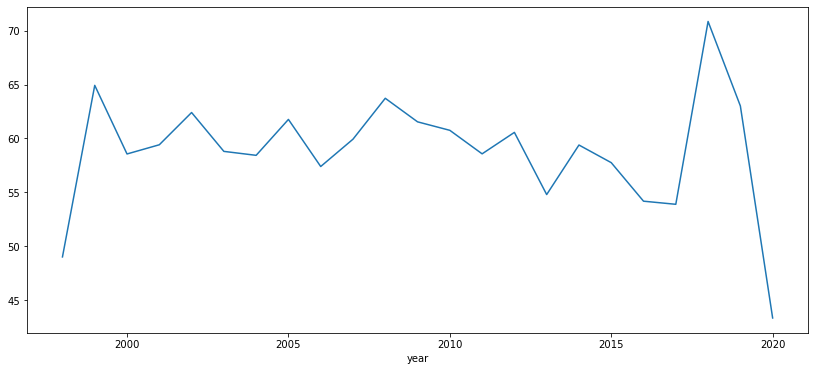

In [26]:
# Plot mean popularity per year
data_frame.groupby("year")["popularity"].mean().plot(x="year", y="populrity", figsize=(14, 6))

As we can see the the popularity goes up and down. lets visualize how much it changes relative to the mean.

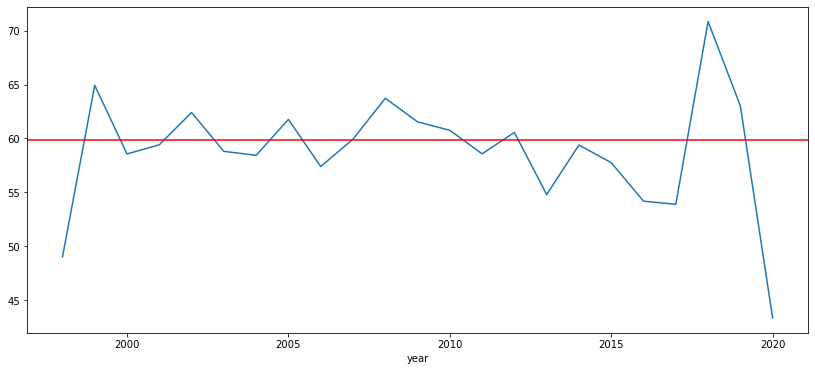

In [30]:
# Add the all time average popularity to the graph
total_popularity_mean = data_frame['popularity'].mean()
data_frame.groupby("year")["popularity"].mean().plot(x="year", y="populrity", figsize=(14, 6)).axhline(y = total_popularity_mean, color = 'r', linestyle = '-')

As we can see, the year with the most popular songs is 2018. Let's see what happend that year.

In [34]:
# Get all songs from 2018
data_frame.loc[(data_frame['year']==2018)].head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
46,Samantha Mumba,Gotta Tell You,201946,False,2018,43,0.729,0.632,0,-8.750,0,0.0279,0.19100,0.000000,0.1660,0.774,109.981,pop
175,DB Boulevard,Point Of View - Radio Edit,231166,False,2018,0,0.676,0.715,6,-6.854,1,0.0287,0.00284,0.074600,0.0685,0.275,129.006,Dance/Electronic
1534,Felix Jaehn,Ain't Nobody (Loves Me Better) (feat. Jasmine ...,186146,False,2018,72,0.778,0.566,2,-6.959,0,0.0311,0.67200,0.000197,0.0698,0.479,117.971,"hip hop, pop, Dance/Electronic"
1592,Sigala,Easy Love,229813,False,2018,66,0.680,0.942,9,-4.208,1,0.0631,0.17500,0.001300,0.1170,0.647,123.976,"pop, Dance/Electronic"
1630,Alan Walker,Faded,212106,False,2018,78,0.468,0.627,6,-5.085,1,0.0476,0.02810,0.000008,0.1100,0.159,179.642,Dance/Electronic


In [53]:
# Most popular song from 2018
songs_from_2018 = data_frame.loc[(data_frame['year']==2018)]
songs_from_2018.loc[songs_from_2018['popularity'] == songs_from_2018['popularity'].max()].head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1819,Billie Eilish,lovely (with Khalid),200185,False,2018,86,0.351,0.296,4,-10.109,0,0.0333,0.934,0.0,0.095,0.12,115.284,"pop, Dance/Electronic"
1929,Billie Eilish,lovely (with Khalid),200185,False,2018,86,0.351,0.296,4,-10.109,0,0.0333,0.934,0.0,0.095,0.12,115.284,"pop, Dance/Electronic"


As we can see, Billie Eillish came out with 2 songs with the same name (??)

In [99]:
#popularity in descending order
data_frame.sort_values('popularity', axis=0, ascending= False, inplace= True, na_position= 'last')
data_frame

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1322,The Neighbourhood,Sweater Weather,240400,False,2013,89,0.612,0.807,10,-2.810,1,0.0336,0.049500,0.017700,0.1010,0.398,124.053,"rock, pop"
1311,Tom Odell,Another Love,244360,True,2013,88,0.445,0.537,4,-8.532,0,0.0400,0.695000,0.000017,0.0944,0.131,122.769,pop
201,Eminem,Without Me,290320,True,2002,87,0.908,0.669,7,-2.827,1,0.0738,0.002860,0.000000,0.2370,0.662,112.238,hip hop
1613,WILLOW,Wait a Minute!,196520,False,2015,86,0.764,0.705,3,-5.279,0,0.0278,0.037100,0.000019,0.0943,0.672,101.003,"pop, R&B, Dance/Electronic"
6,Eminem,The Real Slim Shady,284200,True,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.030200,0.000000,0.0454,0.760,104.504,hip hop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1324,Capital Cities,Safe And Sound,192693,False,2013,0,0.652,0.783,0,-4.829,1,0.0309,0.000189,0.017300,0.0889,0.836,117.952,pop
698,P!nk,Who Knew,208493,False,2006,0,0.688,0.734,9,-4.569,1,0.0274,0.004620,0.000000,0.0756,0.460,140.004,pop
1468,Tiësto,Red Lights,263890,False,2013,0,0.653,0.829,10,-4.783,1,0.0377,0.000739,0.000002,0.2250,0.545,124.989,"pop, Dance/Electronic"
1715,Maroon 5,Cold (feat. Future),234308,True,2017,0,0.697,0.716,9,-6.288,0,0.1130,0.118000,0.000000,0.0424,0.506,99.905,pop


In [358]:
#Artists with 86 popularity
data_frame.loc[(data_frame['popularity']==86)].artist.reset_index() #,.head()

,index,artist
0,6,Eminem
1,1613,WILLOW
2,1819,Billie Eilish
3,1929,Billie Eilish


In [359]:
# Count how many songs with the same name there are
data_frame['song'].value_counts().reset_index()

,index,song
0,Sorry,5
1,Don't,3
2,Closer,3
3,Breathe,3
4,It's My Life,3
...,...,...
1874,Dani California,1
1875,What Hurts The Most,1
1876,You Know I'm No Good,1
1877,Ms. New Booty,1


As we can see, the most popular name for a song is Sorry. I wounder why.

In [312]:
#songs with name "sorry"
data_frame.loc[data_frame['song'] == 'Sorry']

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
611,Madonna,Sorry,281880,False,2005,61,0.589,0.877,0,-6.229,0,0.0460,0.00121,0.013000,0.169,0.443,132.971,pop
1593,Justin Bieber,Sorry,200786,False,2015,80,0.654,0.760,0,-3.669,0,0.0450,0.07970,0.000000,0.299,0.410,99.945,pop
1611,Justin Bieber,Sorry,200786,False,2015,80,0.654,0.760,0,-3.669,0,0.0450,0.07970,0.000000,0.299,0.410,99.945,pop
1695,Beyoncé,Sorry,232560,True,2016,67,0.775,0.598,2,-7.274,1,0.0535,0.00175,0.000004,0.253,0.356,129.988,"pop, R&B"
1993,Joel Corry,Sorry,188640,False,2019,63,0.744,0.790,8,-4.617,0,0.0562,0.05470,0.000802,0.320,0.847,125.002,"pop, Dance/Electronic"


In [314]:
#song with the highst energy
data_frame.loc[data_frame['energy']==data_frame['energy'].max()][['song','energy']]

,song,energy
477,Come With Me - Radio Edit,0.999


In [319]:
#all pop songs
data_frame.loc[(data_frame['genre']=="pop")].head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
10,Gigi D'Agostino,L'Amour Toujours,238759,False,2011,1,0.617,0.728,7,-7.932,1,0.0292,0.0328,0.048200,0.3600,0.808,139.066,pop
11,Eiffel 65,Move Your Body - Gabry Ponte Original Radio Edit,268863,False,1999,56,0.745,0.958,7,-9.664,1,0.0287,0.0813,0.324000,0.5330,0.960,129.962,pop
12,Bomfunk MC's,Freestyler,306333,False,2000,55,0.822,0.922,11,-5.798,0,0.0989,0.0291,0.325000,0.2520,0.568,163.826,pop


In [320]:
#all hip hop songs
data_frame.loc[(data_frame['genre']=="hip hop")].head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
6,Eminem,The Real Slim Shady,284200,True,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.0302,0.00000,0.0454,0.760,104.504,hip hop
19,Dr. Dre,The Next Episode,161506,True,1999,82,0.922,0.909,10,-2.429,0,0.2700,0.0281,0.00000,0.0856,0.309,95.295,hip hop
23,M.O.P.,Cold as Ice,244466,True,2000,54,0.656,0.880,11,-5.425,0,0.1430,0.0421,0.00000,0.2940,0.758,85.565,hip hop
37,JAY-Z,Big Pimpin',283066,True,1999,69,0.880,0.814,11,-6.307,0,0.1400,0.1680,0.00672,0.0584,0.942,138.083,hip hop
43,Dr. Dre,Forgot About Dre,222293,True,1999,79,0.924,0.740,8,-1.299,1,0.0774,0.0827,0.00000,0.1630,0.621,133.974,hip hop
